<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ASTRO_BEAM_recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Simulating a radio signal

##Creating an "off" signal

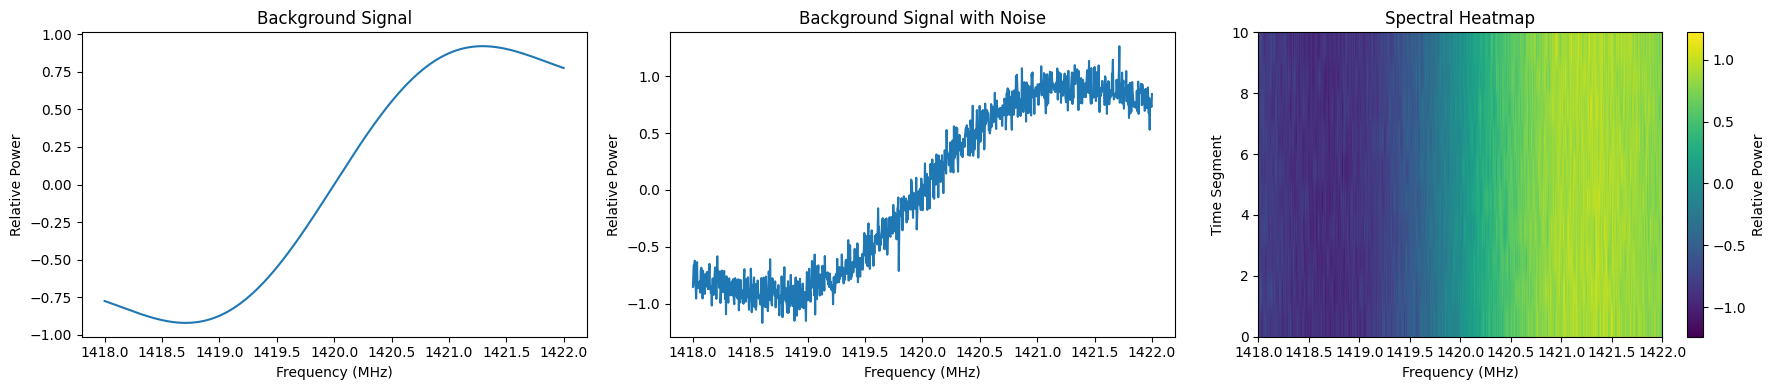

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Frequencies of the signal (with a bandwidth of 4 MHz)

# Create a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Noise generation
noise = np.random.normal(0, 0.1, len(background_signal))  # Generate noise with μ = 0, σ = 0.1

# Add the noise to the background signal
background_signal_noised = background_signal + noise

#-------------------------------------------------------------------------------------------------------------
# Defined a function to automate random sample signal generation
def generate_background_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_signal_noised = background_signal + noise
    return background_signal_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_background_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plot the background signal (left plot)
axs[0].plot(freq_range, background_signal)
axs[0].set_title("Background Signal")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the background signal with noise (center plot)
axs[1].plot(freq_range, background_signal_noised)
axs[1].set_title("Background Signal with Noise")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap (right plot)
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

##Creating an "on" signal

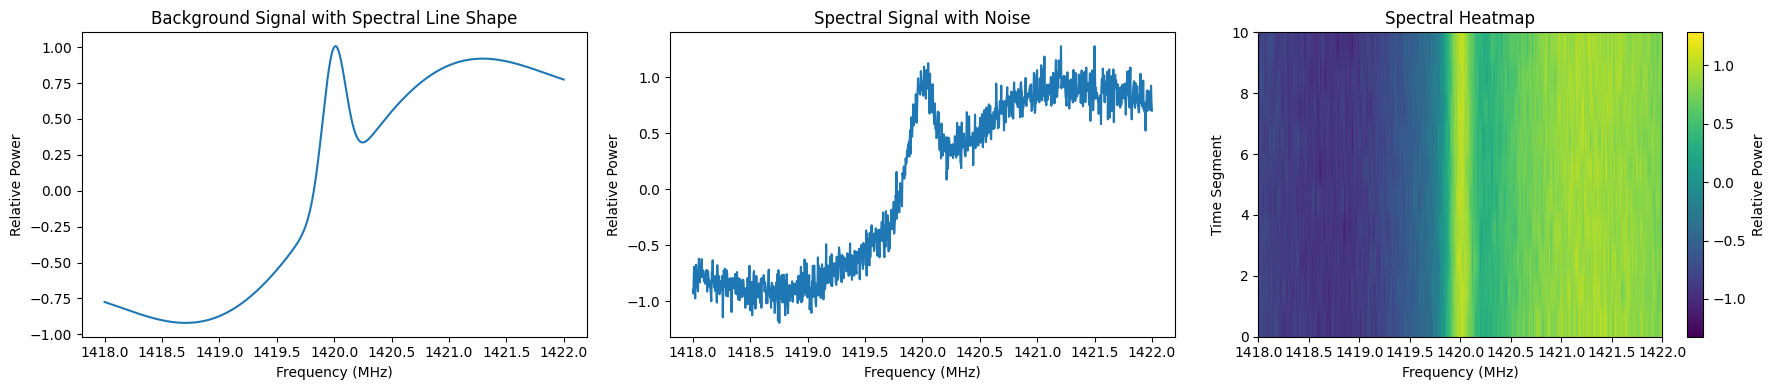

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Frequencies of the signal (with a bandwidth of 4 MHz)

# Create a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) +
                     0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
background_signal += spectral_line_shape

# Generate noise with μ = 0, σ = 0.1
noise = np.random.normal(0, 0.1, len(background_signal))

# Add the noise to the background signal
spectral = background_signal + noise

#-------------------------------------------------------------------------------------------------------------
# Defined a function to automate random sample signal generation
def generate_spectral_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_spectral_noised = background_signal + noise # Add noise
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_spectral_noised += spectral_line_shape # Add spectral line shape
    return background_spectral_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_spectral_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plot the background signal with spectral line shape (left plot)
axs[0].plot(freq_range, background_signal)
axs[0].set_title("Background Signal with Spectral Line Shape")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the spectral signal with noise (center plot)
axs[1].plot(freq_range, spectral)
axs[1].set_title("Spectral Signal with Noise")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap (right plot)
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Show the side-by-side plots
plt.tight_layout()
plt.show()

Gnerating the spactral line shape with twice the samples

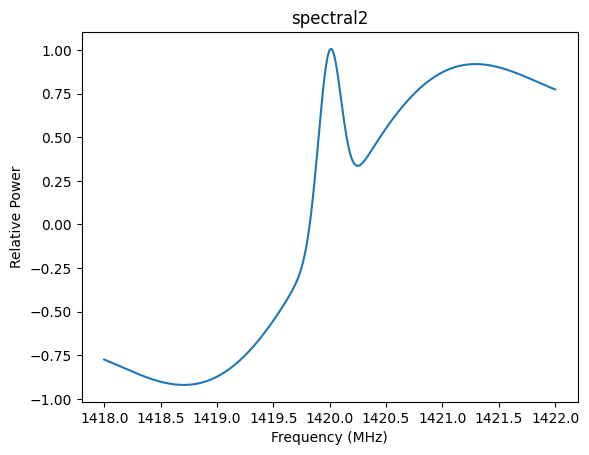

In [4]:
# Signal parameters
n_samples = 2000 # Twice the previous number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
spectral2 = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
spectral2 += spectral_line_shape

#Plot the background signal
plt.plot(freq_range, spectral2)
plt.title("spectral2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#2. Signal Smoothing

2.1 Averaging over time

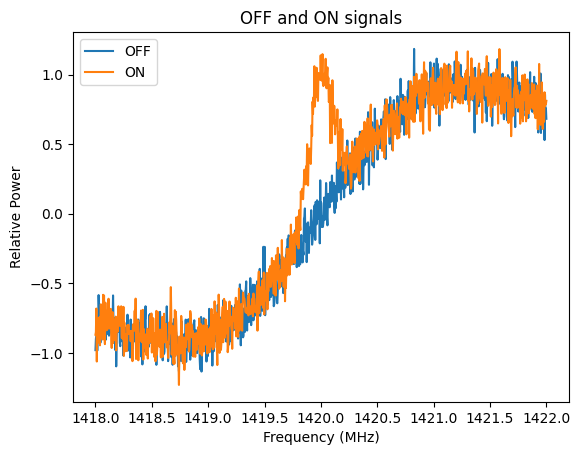

In [6]:
# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Creating "OFF" signal according to previous steps
background_signal_OFF = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
noise = np.random.normal(0, 0.1, len(background_signal_OFF))
signal_OFF = background_signal_OFF + noise

#Create "ON" signal according to previous steps
background_signal_ON = background_signal_OFF
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
background_signal_ON += spectral_line_shape
noise = np.random.normal(0, 0.1, len(background_signal_ON))
signal_ON = background_signal_ON + noise

#Plot both the signals
plt.plot(freq_range, signal_OFF, label="OFF")
plt.plot(freq_range, signal_ON, label="ON")
plt.title("OFF and ON signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.show()

2.2 Removing Background

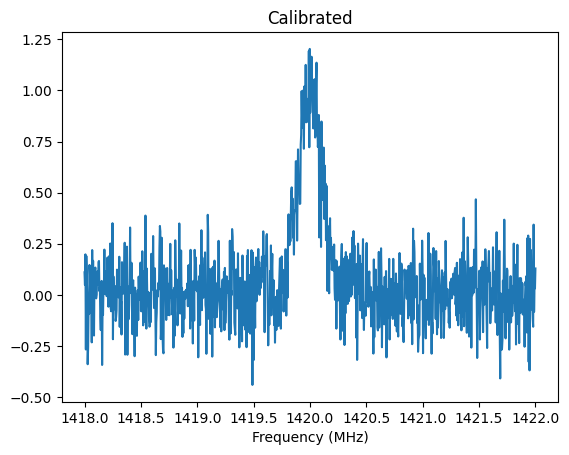

In [7]:
#Use on - off calibration to calibrate
calibrated_signal = signal_ON - signal_OFF

#Plot the calibrated signal
plt.plot(freq_range, calibrated_signal)
plt.title("Calibrated")
plt.xlabel("Frequency (MHz)")
plt.show()

2.3 Moving average

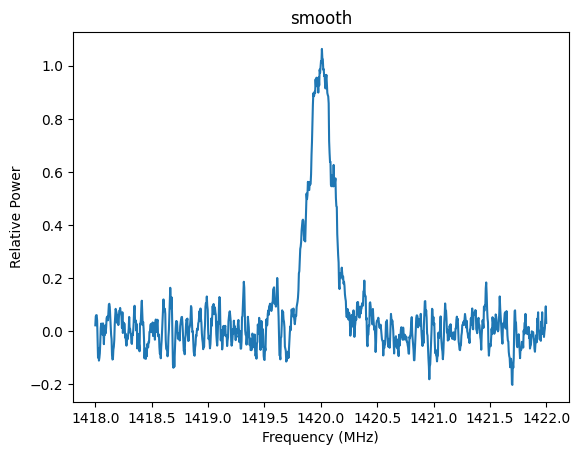

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create an empty array to store the moving average values
smooth = np.zeros(len(freq_range))

# Smooth the first 3 points
smooth[0] = np.mean(calibrated_signal[:4])
smooth[1] = np.mean(calibrated_signal[:5])
smooth[2] = np.mean(calibrated_signal[:6])

# Smooth each point with the previous and next 3 points (N = 7, so that (N-1)/2 = 3)
for i in range(3, len(freq_range) - 3):
    smooth[i] = np.mean(calibrated_signal[i-3:i+3])

# Smooth the last 3 points
smooth[-3] = np.mean(calibrated_signal[-6:])
smooth[-2] = np.mean(calibrated_signal[-5:])
smooth[-1] = np.mean(calibrated_signal[-4:])

# Plot the smoothed signal
plt.plot(freq_range, smooth)
plt.title("smooth")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#3. Spectral Line Detection

Identifying the frequency where the spectral line peaks

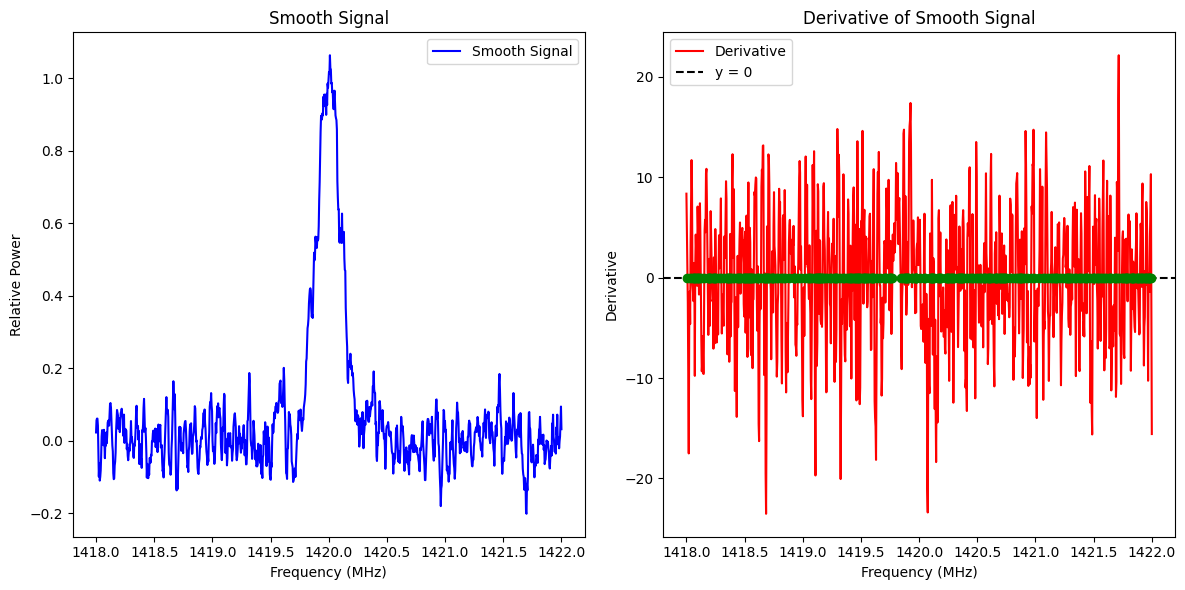

Intercepts between derivative and y=0 in the range 1419.8-1420.2 MHz occur at: [1418.008773627165, 1418.0343084136355, 1418.051753751699, 1418.0625198354874, 1418.0683846128663, 1418.0756442665306, 1418.0901342141844, 1418.0925025780346, 1418.1053199040778, 1418.1100050294976, 1418.123291121604, 1418.1532660162284, 1418.1826545464778, 1418.1935784748596, 1418.1973203830323, 1418.2044456643246, 1418.2192237199486, 1418.2353464643263, 1418.2380900891537, 1418.2465428624848, 1418.2548338359593, 1418.2758151871653, 1418.300119025877, 1418.3225409986844, 1418.346750706648, 1418.3562179572364, 1418.35660879507, 1418.3743985764336, 1418.378086401119, 1418.3891745201088, 1418.4114752748183, 1418.4389332809308, 1418.4416650694452, 1418.4479345006405, 1418.4635645759688, 1418.4665913381866, 1418.4908363184106, 1418.4986473116908, 1418.5063264379974, 1418.5136180057714, 1418.5205753882642, 1418.5277869016188, 1418.535354168585, 1418.542228001132, 1418.5498778105537, 1418.5601710577114, 1418.56111

In [14]:
# Initiate derivative list
derivative = np.zeros(len(smooth))

# Find the slope between every two consecutive points
for i in range(1, len(smooth) - 1):
    derivative[i] = (smooth[i+1] - smooth[i-1]) / (freq_range[i+1] - freq_range[i-1])

# Calculate derivatives for first and last point
derivative[0] = (smooth[1] - smooth[0]) / (freq_range[1] - freq_range[0])
derivative[-1] = (smooth[-1] - smooth[-2]) / (freq_range[-1] - freq_range[-2])

# Find intercept between the derivative and y=0
zero_crossings = np.where(np.diff(np.sign(derivative)))[0]
intercepts = []
for zc in zero_crossings:
    # Estimate intercept point by using linear interpolation
    x1, x2 = freq_range[zc], freq_range[zc + 1]
    y1, y2 = derivative[zc], derivative[zc + 1]
    intercept_x = x1 - y1 * (x2 - x1) / (y2 - y1)
    intercepts.append(intercept_x)

# Plot the original signal and its derivative
plt.figure(figsize=(12, 6))

# Plot the original smooth signal
plt.subplot(1, 2, 1)
plt.plot(freq_range, smooth, label='Smooth Signal', color='blue')
plt.title('Smooth Signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()

# Plot the derivative with y=0 line and intercepts
plt.subplot(1, 2, 2)
plt.plot(freq_range, derivative, label='Derivative', color='red')
plt.axhline(0, color='black', linestyle='--', label='y = 0')  # y=0 line

# Mark the intercept points on the plot
for intercept_x in intercepts:
    plt.plot(intercept_x, 0, 'go')

plt.title('Derivative of Smooth Signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Derivative')
plt.legend()

plt.tight_layout()
plt.show()

# Print the intercept points
print(f"Intercepts between derivative and y=0 in the range 1419.8-1420.2 MHz occur at: {intercepts}")

Calculating the SNR(db)

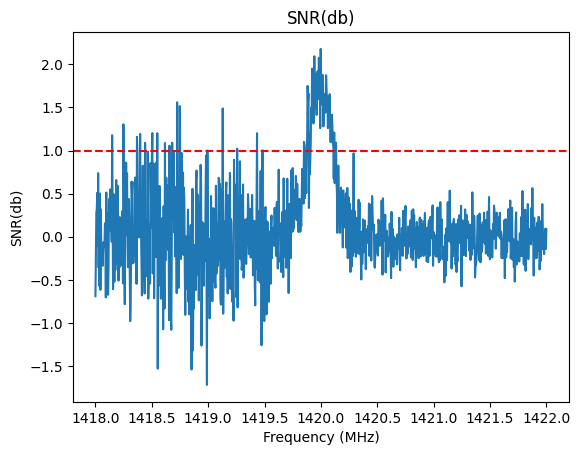

In [ ]:
# #We calculate SNR by dividing the ON signal by the OFF signal and converting it to decibels
# SNR = 10 * np.log10((signal_ON - 98) / (signal_OFF - 98))

# #Plot the SNR(db) along with a horizontal line, showing where the SNR(db) is higher than 1
# plt.plot(freq_range, SNR)
# plt.axhline(y=1, color='r', linestyle='--')
# plt.title("SNR(db)")
# plt.xlabel("Frequency (MHz)")
# plt.ylabel("SNR(db)")
# plt.show()

#4. Upsamping

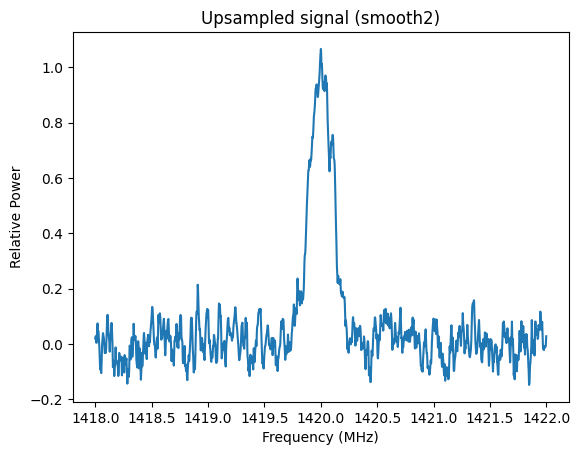

In [ ]:
#We upsample the smooth signal by using linear interpolation, doubling its sample size (from 1000 to 2000 samples)
smooth2 = np.interp(np.linspace(freq_range[0], freq_range[-1], 2000), freq_range, smooth)

#Plot the upsampled signal
plt.plot(np.linspace(freq_range[0], freq_range[-1], 2000), smooth2)
plt.title("Upsampled signal (smooth2)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#5. Spectral Line Fitting

Fitting the smooth signal

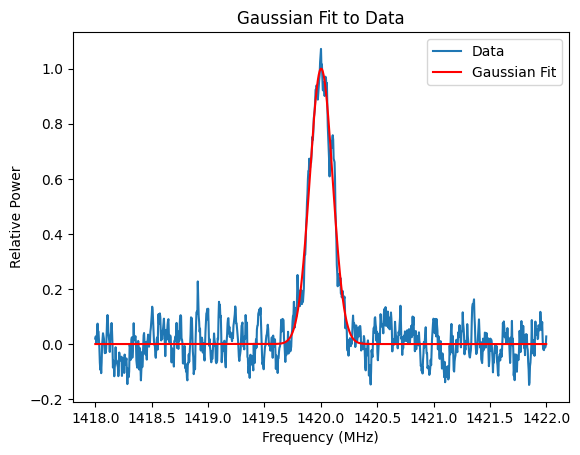

Fitted parameters:
Amplitude (A): 1.0000156673735128
Mean (μ): 1420.0034269534435
Standard Deviation (σ): -0.10084404415122843


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function with amplitude (A), mean (mu), and standard deviation (sigma)
def Gauss(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Provide an initial guess for A, mu, and sigma
initial_guess = [1.01, 1420, 1]

# Perform curve fitting
parameters, covariance = curve_fit(Gauss, freq_range, smooth, p0=initial_guess)

# Extract fitted parameters
fit_A = parameters[0]
fit_mu = parameters[1]
fit_sigma = parameters[2]

# Generate the Gaussian fit
fit = Gauss(freq_range, fit_A, fit_mu, fit_sigma)

# Plot the data and the fit
plt.plot(freq_range, smooth, label='Data')
plt.plot(freq_range, fit, label='Gaussian Fit', color='red')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.title('Gaussian Fit to Data')
plt.show()

# Print the fitted parameters
print(f"Fitted parameters:\nAmplitude (A): {fit_A}\nMean (μ): {fit_mu}\nStandard Deviation (σ): {fit_sigma}")

Fitting the smooth2 signal

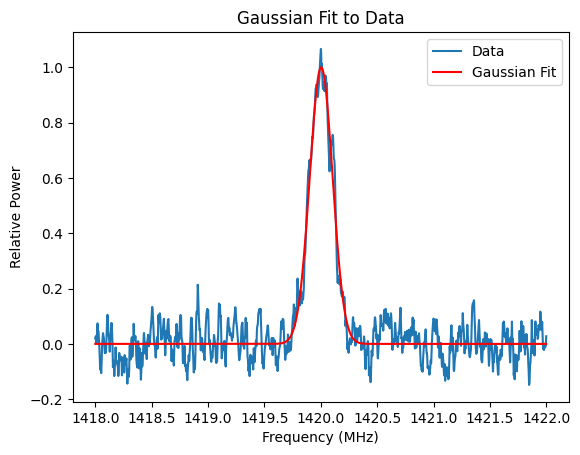

Fitted parameters:
Amplitude (A): 1.0000156673735128
Mean (μ): 1420.0034269534435
Standard Deviation (σ): -0.10084404415122843


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# We create the upsampled freq_range
freq_range2 = np.linspace(1418, 1422, 2 * n_samples)

# Define the Gaussian function with amplitude (A), mean (mu), and standard deviation (sigma)
def Gauss(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Provide an initial guess for A, mu, and sigma
initial_guess2 = [1.01, 1420, 1]

# Perform curve fitting
parameters2, covariance2 = curve_fit(Gauss, freq_range2, smooth2, p0=initial_guess)

# Extract fitted parameters
fit_A2 = parameters2[0]
fit_mu2 = parameters2[1]
fit_sigma2 = parameters2[2]

# Generate the Gaussian fit
fit2 = Gauss(freq_range2, fit_A2, fit_mu2, fit_sigma2)

# Plot the data and the fit
plt.plot(freq_range2, smooth2, label='Data')
plt.plot(freq_range2, fit2, label='Gaussian Fit', color='red')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.title('Gaussian Fit to Data')
plt.show()

# Print the fitted parameters
print(f"Fitted parameters:\nAmplitude (A): {fit_A}\nMean (μ): {fit_mu}\nStandard Deviation (σ): {fit_sigma}")

#6. Error estimation

We compare the "fit" and "spectral" signals

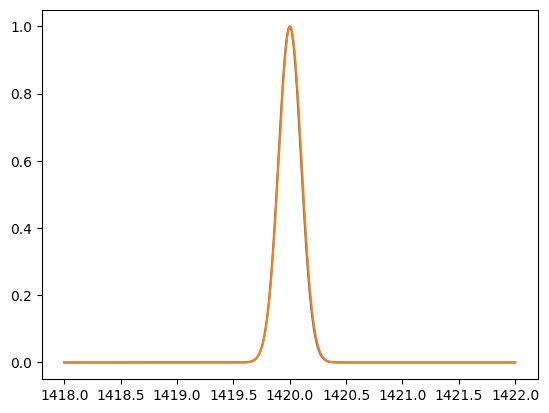

Standard Error of the Estimate: 0.06153925392677703
R-squared: 0.9143383766026434


In [ ]:
# We firsly plot the "fit" and "spectral" signals in the same graph
plt.plot(freq_range, spectral_line_shape, label='smooth')
plt.plot(freq_range, fit, label='fit')
plt.show()

# Calculate residuals
residuals = smooth - fit

# Calculate standard error of the estimate
standard_error = np.sqrt(np.sum(residuals**2) / (len(smooth) - len(parameters)))

# We calculate the R-squared matric to evaluate how well our model explains the "smooth" curve's points
ss_res = np.sum(residuals**2)
ss_tot = np.sum((smooth - np.mean(smooth))**2)
r_squared = 1 - (ss_res / ss_tot)

# Display the error metrics
print(f"Standard Error of the Estimate: {standard_error}")
print(f"R-squared: {r_squared}")

We compare the "fit2" and "spectral2" signals

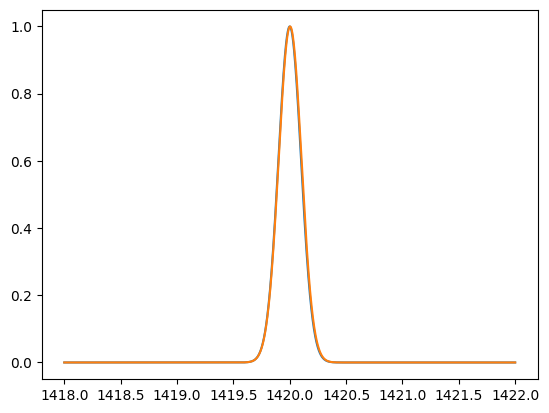

Standard Error of the Estimate: 0.05963350698235476
R-squared: 0.9190514948415107


In [ ]:
#Upsample the spectral_line_shape
spectral_line_shape2 = np.interp(np.linspace(freq_range[0], freq_range[-1], 2000), freq_range, spectral_line_shape)

# We firsly plot the "fit2" and "spectral_line_shape2" signals in the same graph
plt.plot(freq_range2, spectral_line_shape2, label='smooth')
plt.plot(freq_range2, fit2, label='fit')
plt.show()

# Calculate residuals
residuals2 = smooth2 - fit2

# Calculate standard error of the estimate
standard_error2 = np.sqrt(np.sum(residuals2**2) / (len(smooth2) - len(parameters2)))

# We calculate the R-squared matric to evaluate how well our model explains the "smooth" curve's points
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((smooth2 - np.mean(smooth2))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Display the error metrics
print(f"Standard Error of the Estimate: {standard_error2}")
print(f"R-squared: {r_squared2}")